<a href="https://colab.research.google.com/github/zuckeer/imersao-dados-desafio-final/blob/main/ProjetoFinal_Experimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto final

Realizamos a importação da primeira base com os dados dos experimentos. Essa base apresenta o apanhado da avaliação da resposta celular à aplicação de uma molécula coletando os dados da observação da expressão gênica ao composto em intervalos de tempo de 24, 48 e 72 horas.

In [3]:
import pandas as pd
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

A base de dados apresentada apresentou 23.814 análises:



In [4]:
dados.shape

(23814, 877)

Onde a métrica dividiu a pesquisa em dois grupos:


In [11]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

A avaliação tratou 92,16% com droga e 7,84% formaram o grupo controle.

In [12]:
round(dados['tratamento'].value_counts(normalize = True)*100, 3)

com_droga       92.164
com_controle     7.836
Name: tratamento, dtype: float64

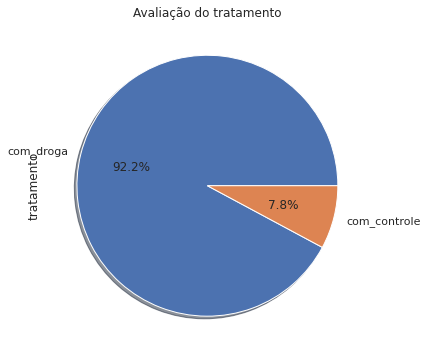

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(8, 6))
dados['tratamento'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Avaliação do tratamento')
plt.show()

## A aplicação
A aplicação da molécula obedeceu duas dosagens distintas: D1 e D2 


In [14]:
dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

Onde 51,008% recebeu a dosagem 1 e 48.992% a dosagem 2

In [15]:
round(dados['dose'].value_counts(normalize = True)*100, 3)

D1    51.008
D2    48.992
Name: dose, dtype: float64

## Metodologia
Em nossa análise, avaliamos os resultados buscando identificar relações entre aplicação, a atuação ou não do composto ao longo dos recortes de tempo fornecidos, entre os diversos compostos apresentados e entre a expressão gênica e a resposta celular.

A observação da administração das doeses de droga aplicada foi dividida em intervalos de tempo para em horas. A medição retrada o comportamento das células ao longo das 72 horas.

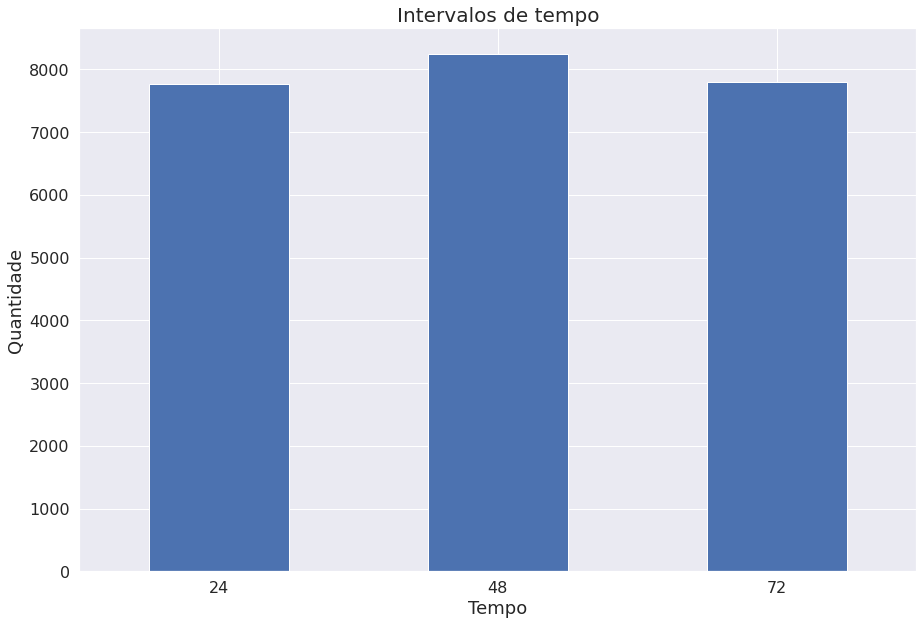

In [18]:
plt.figure(figsize=(15, 10))
valor_tempo = dados['tempo'].value_counts(ascending=True)
ax = valor_tempo.sort_index().plot.bar()
ax.set_title('Intervalos de tempo', fontsize=20)
ax.set_xlabel('Tempo', fontsize=18)
ax.set_ylabel('Quantidade', fontsize=18)
plt.xticks(rotation = 0, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Seleção dos compostos
Ao longo da análise dos dados fornecidos, pode-se observar a prevalência de 5 compostos ocultos.

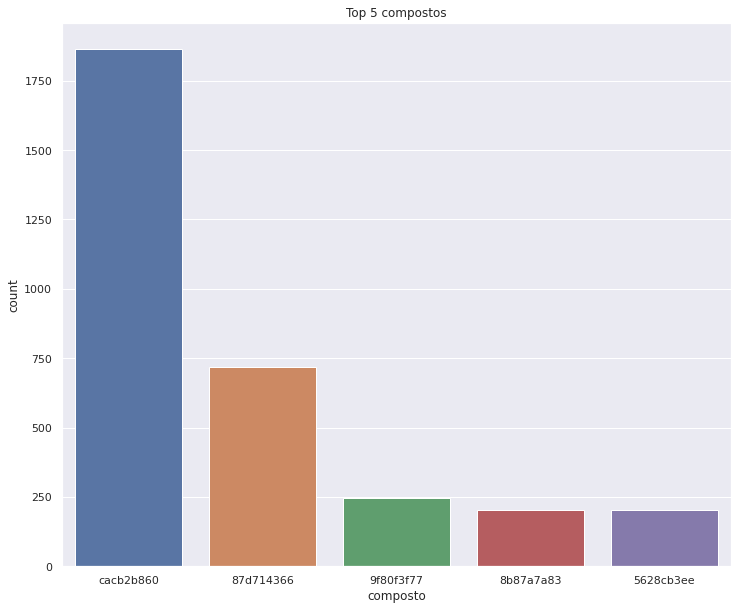

In [24]:
# ajuste do nome da serie para facilitar a analise
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)
# query para  visualização da seria escolhida
cod_compostos = dados['composto'].value_counts().index[0:5]
dados.query('composto in @cod_compostos')
#elaboracao do grafico demonstrativo
sns.set()
plt.figure(figsize=(12, 10))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'), order=cod_compostos)
ax.set_title('Top 5 compostos')
plt.show()

## Cruzamento dos dados

Para facilitar a análise dos dados, buscou-se fazer o cruzamento entre as informações para evidenciar eventuais relações. Não foi observada causalidade nas relações estabelecidas ao longo da análise dos dados. 

In [26]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'])
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index')


tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [27]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

## Gráficos de calor Expressão Gênica

Avaliação da correlação entre a expressão gênica entre 0 e 50


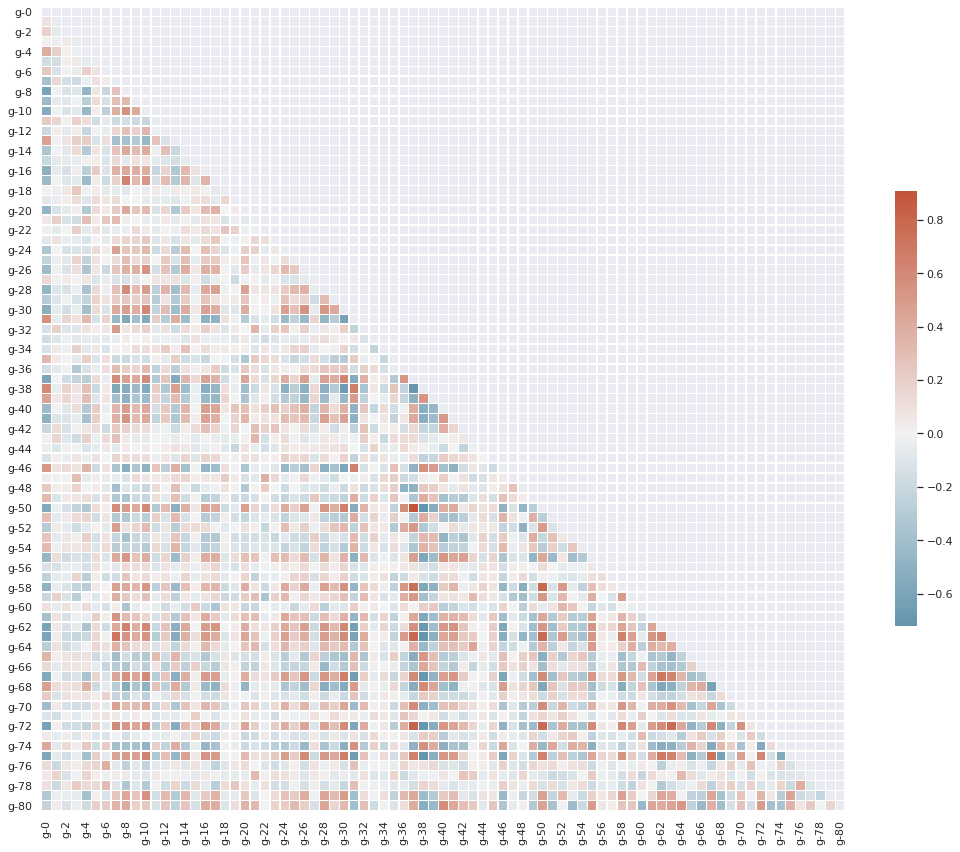

In [36]:
import numpy as np
corr1 = dados.loc[:,'g-0':'g-80'].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr1, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 16))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Avaliação da Expressão gênica G-81 a G-159

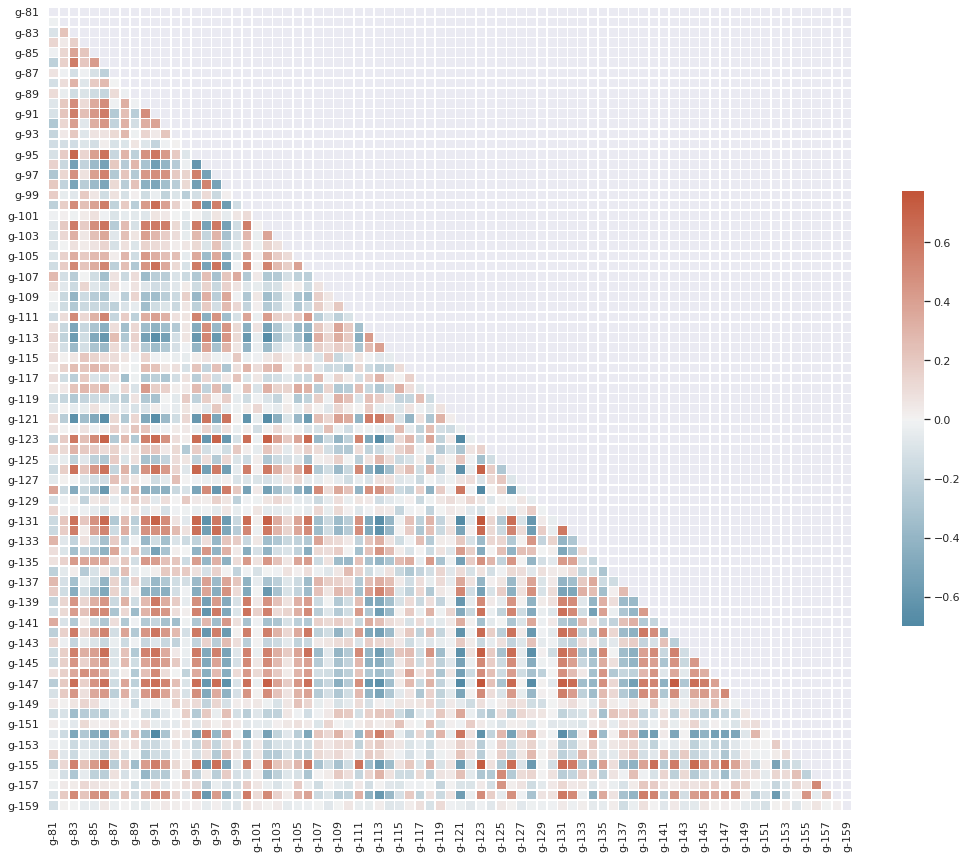

In [37]:
corr2 = dados.loc[:,'g-81':'g-159'].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr2, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 16))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Avaliação da correlação entre expressão gênica

A avaliação identificou através do mapa de calor relações entre os dados fornecidos.

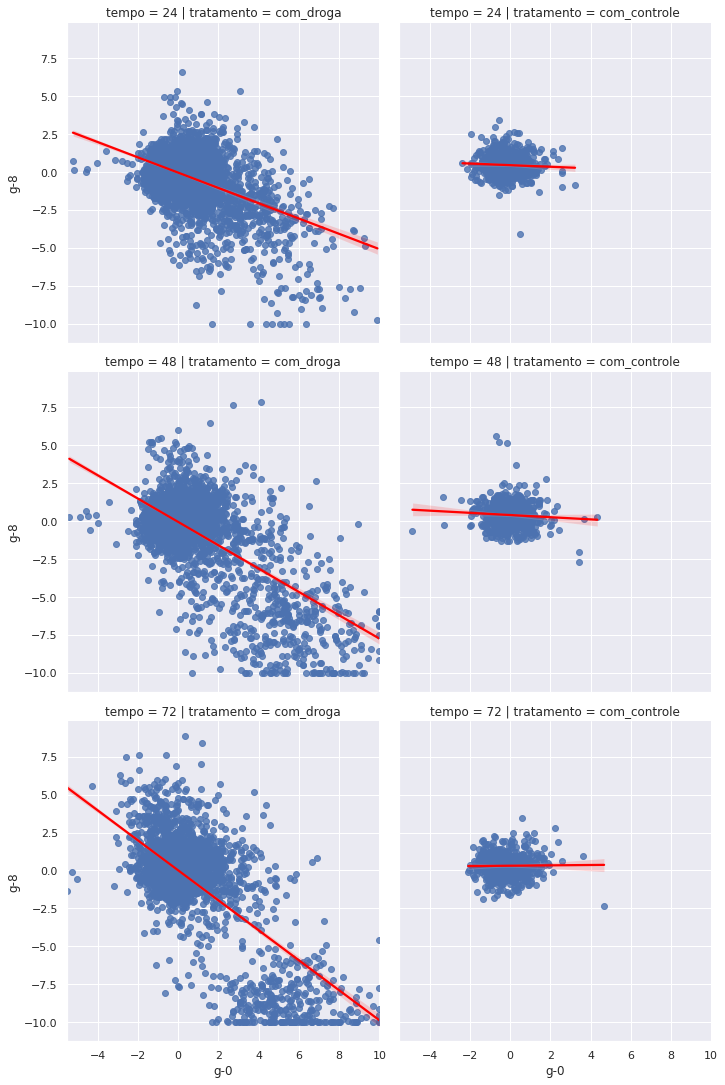

In [32]:

sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento', row='tempo')


Observação da correlação forte entre a expressões gênicas 37 e 50 observada no mapa de calor
 

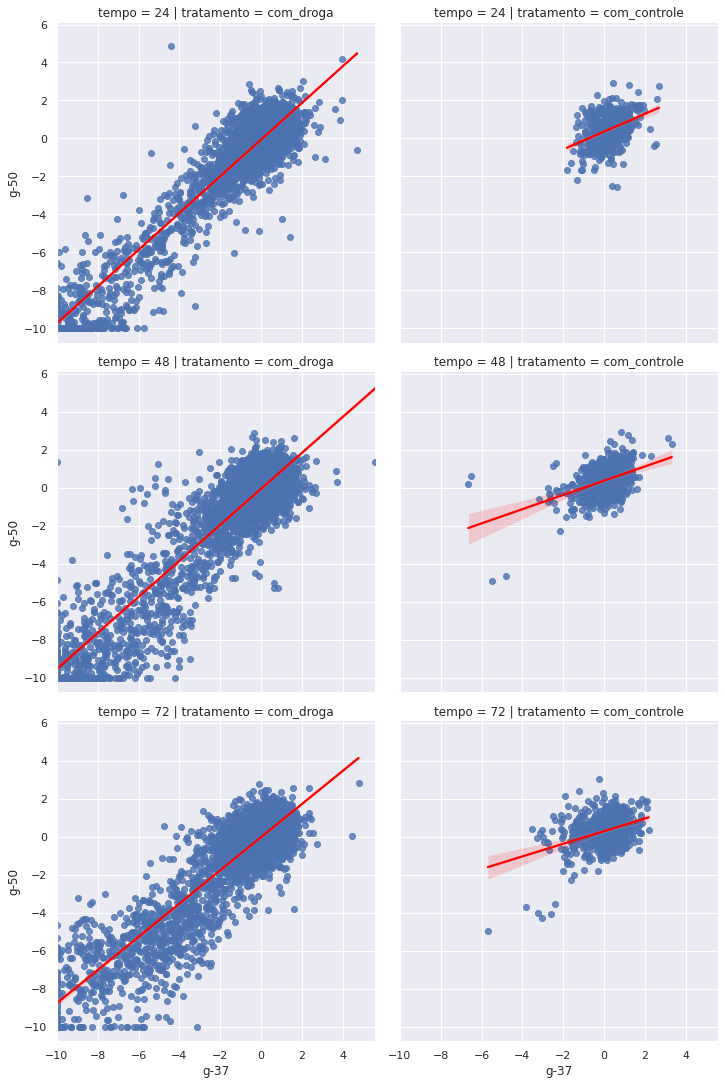

In [31]:
sns.lmplot(data=dados, x='g-37', y='g-50', line_kws={'color': 'red'}, col='tratamento', row='tempo')

In [38]:
round(dados.loc[:,'g-0':'g-771'].corr() * 100, 4)
corrAlta = [dados.loc[:,'g-0':'g-771'].corr() > 0,8]
corr = dados.loc[:,'g-0':'g-50'].corr()

In [39]:
corrAlta

[         g-0    g-1    g-2    g-3    g-4  ...  g-767  g-768  g-769  g-770  g-771
 g-0     True   True   True   True   True  ...  False   True  False  False   True
 g-1     True   True  False  False   True  ...  False  False  False  False  False
 g-2     True  False   True   True   True  ...  False   True   True  False   True
 g-3     True  False   True   True  False  ...  False   True  False  False   True
 g-4     True   True   True  False   True  ...   True   True  False  False   True
 ...      ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
 g-767  False  False  False  False   True  ...   True  False   True   True  False
 g-768   True  False   True   True   True  ...  False   True   True  False   True
 g-769  False  False   True  False  False  ...   True   True   True   True  False
 g-770  False  False  False  False  False  ...   True  False   True   True  False
 g-771   True  False   True   True   True  ...  False   True  False  False   True
 
 [772 rows x 7

## Gráfico de calor da Resposta Celular


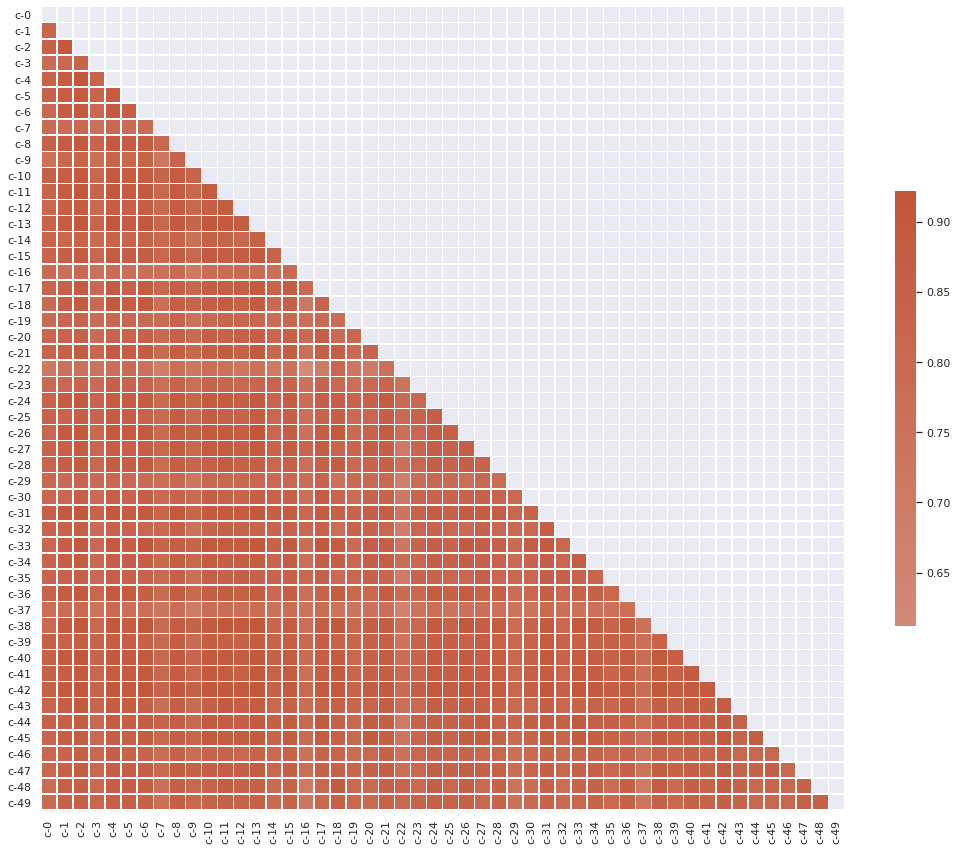

In [43]:
corr_celular1 = dados.loc[:,'c-0':'c-49'].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular1, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 16))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular1, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


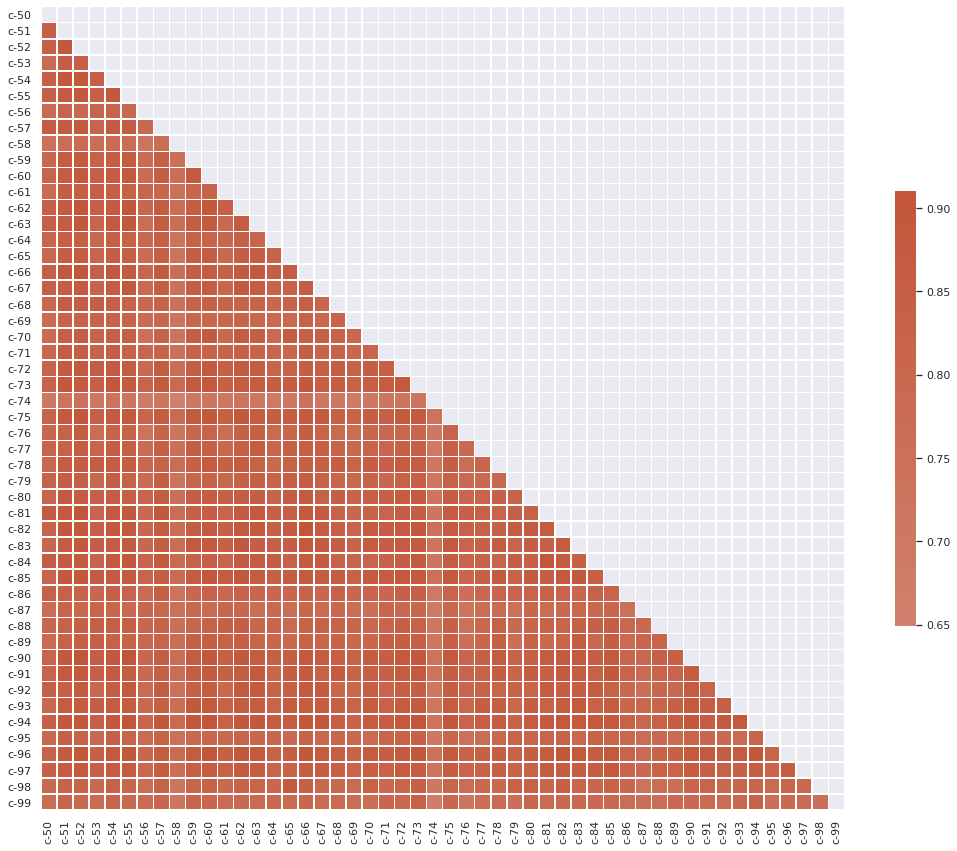

In [44]:
corr_celular2 = dados.loc[:,'c-50':'c-99'].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular2, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 16))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular2, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Avaliação da correlação entre respostas celulares

A avaliação identificou através do mapa de calor relações entre os dados fornecidos.

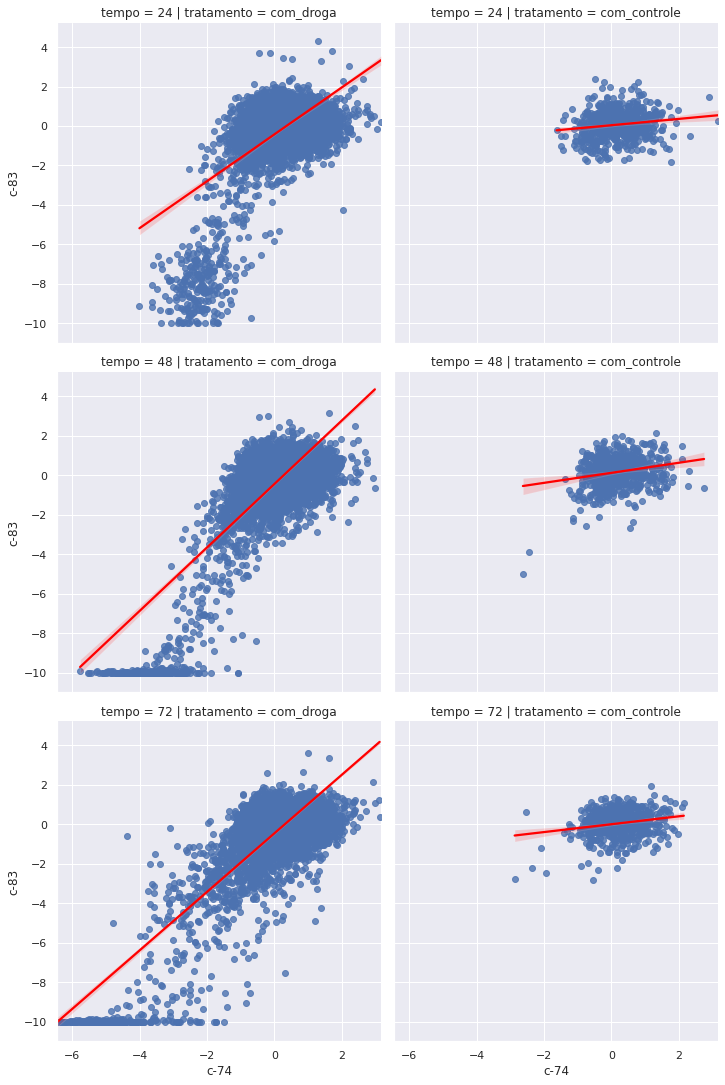

In [47]:
sns.lmplot(data=dados, x='c-74', y='c-83', line_kws={'color': 'red'}, col='tratamento', row='tempo')

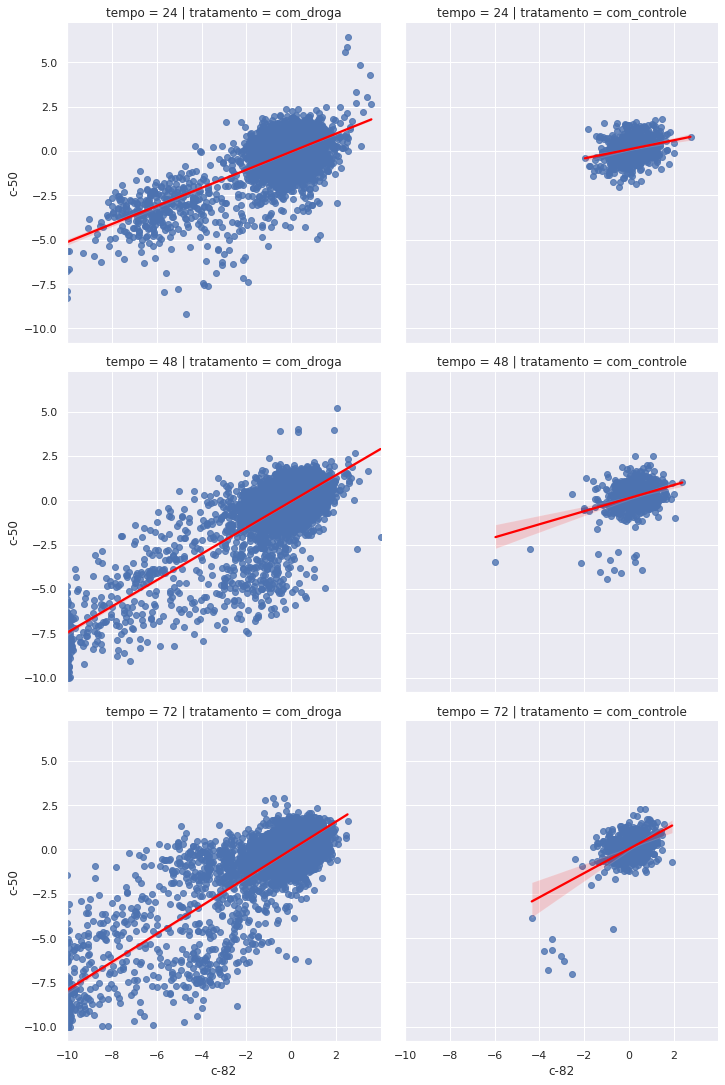

In [48]:
sns.lmplot(data=dados, x='c-82', y='c-50', line_kws={'color': 'red'}, col='tratamento', row='tempo')